In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip install tensorflow==2.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 48.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

1/1 [==============================] - 1s 809ms/step


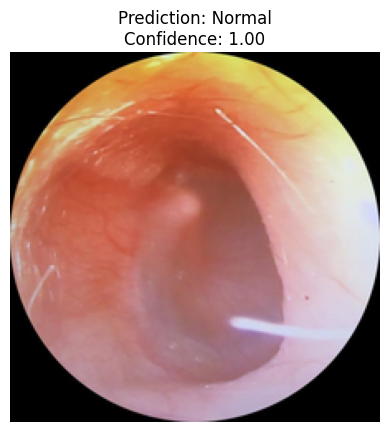

Class: Normal
Confidence Score: 0.99961674


In [5]:
import numpy as np
from keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Suppress scientific notation in numpy print
np.set_printoptions(suppress=True)

# Load the pre-trained model
model = load_model("/content/drive/MyDrive/Cholesteatoma_model/inceptionv3(1).h5", compile=False)

# Class labels
class_names = ["Normal", "Stage 1", "Stage 2", "Stage 3"]

# Path to the image to be tested
image_path = "/content/drive/MyDrive/Cholesteatoma_dataset/Normal/AOM_1_png.rf.57ef9e3ef21524ede53188c0229bc616.jpg"

# Load and preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    # Open the image and ensure it's in RGB mode
    image = Image.open(image_path).convert("RGB")

    # Resize the image to the target size
    image = ImageOps.fit(image, target_size, Image.Resampling.LANCZOS)

    # Convert image to numpy array and normalize
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Expand dimensions to match model input
    return np.expand_dims(normalized_image_array, axis=0), image

# Preprocess the image and get the displayable version
data, display_image = preprocess_image(image_path)

# Perform the prediction
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Display the image with the prediction
plt.imshow(display_image)
plt.axis('off')
plt.title(f"Prediction: {class_name}\nConfidence: {confidence_score:.2f}")
plt.show()

# Print detailed prediction results
print("Class:", class_name)
print("Confidence Score:", confidence_score)
